# Dense Pt 1.
---

Using the beat-synced features parsed from the small subset of 240 songs.  Because of the issues I had with the full dataset I am not comfortable making any claims about the performance of these models even though to did better than the other ones.  It does suggest that the feature vectors extracted from the whole songset were corrupted somehow and the features themselves are good for classifiers.  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, MaxPool1D
from tensorflow.keras import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [9]:
df = pd.read_csv("../data/subset_df.csv")
df.head()

,title,genre,file_path
0,'test','DnB',D:\MusicSubset\DnB\614music+dancingwithspirits...
1,'one04 866609','DnB',D:\MusicSubset\DnB\axaschaller+one04.mp3
2,'Dead or Alive','DnB',D:\MusicSubset\DnB\beatcomplot+deadoralive.mp3
3,'*DnB* Panacea 1Hit Free DL!!!','DnB',D:\MusicSubset\DnB\beatjunkierato+dnbpanacea1h...
4,'*Jungle* Sensi |#1Hit Free DL!!!','DnB',D:\MusicSubset\DnB\beatjunkierato+junglesensi1...


In [4]:
X = features
y = df['genre']

lb = LabelEncoder()
y = tf.keras.utils.to_categorical(lb.fit_transform(y), num_classes=6)

In [5]:
y.shape

(240, 6)

In [6]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.9, random_state=42, stratify=y)

In [7]:
ss = StandardScaler()

Xtrain_ss = ss.fit_transform(Xtrain)
Xtest_ss = ss.transform(Xtest)

In [8]:
print(Xtrain_ss.shape)
print(Xtest_ss.shape)
print(ytrain.shape)
print(ytest.shape)

(216, 92)
(24, 92)
(216, 6)
(24, 6)


In [9]:
x_val = Xtrain_ss[:23]
xtrain = Xtrain_ss[23:]

y_val = ytrain[:23]
y_train = ytrain[23:] 

In [42]:
model = Sequential()

model.add(Dense(128, input_shape=(92,), 
                       activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(128, 
                       activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(6, 
                    activation='softmax'))

model.compile(
    loss='categorical_crossentropy', 
    metrics=['accuracy'], 
    optimizer='rmsprop')

In [43]:
hist_1 = model.fit(xtrain,
                   y_train,
                   epochs=20,
                   batch_size=32,
                   validation_data=(x_val, y_val))

Train on 193 samples, validate on 23 samples
Epoch 1/20
193/193 [==============================] - 0s 2ms/sample - loss: 2.1459 - accuracy: 0.1554 - val_loss: 1.6935 - val_accuracy: 0.2609
Epoch 2/20
193/193 [==============================] - 0s 166us/sample - loss: 1.7458 - accuracy: 0.2953 - val_loss: 1.6070 - val_accuracy: 0.2609
Epoch 3/20
193/193 [==============================] - 0s 187us/sample - loss: 1.7039 - accuracy: 0.3212 - val_loss: 1.5779 - val_accuracy: 0.3478
Epoch 4/20
193/193 [==============================] - 0s 176us/sample - loss: 1.5868 - accuracy: 0.3731 - val_loss: 1.5572 - val_accuracy: 0.3043
Epoch 5/20
193/193 [==============================] - 0s 197us/sample - loss: 1.5728 - accuracy: 0.4301 - val_loss: 1.5092 - val_accuracy: 0.3043
Epoch 6/20
193/193 [==============================] - 0s 197us/sample - loss: 1.4902 - accuracy: 0.4145 - val_loss: 1.5049 - val_accuracy: 0.3478
Epoch 7/20
193/193 [==============================] - 0s 207us/sample - loss: 1.5

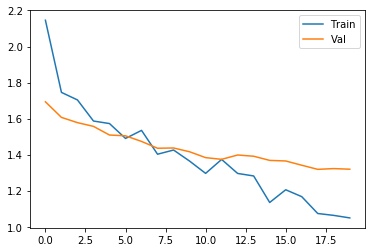

In [46]:
plt.plot(hist_1.history['loss'], label='Train')
plt.plot(hist_1.history['val_loss'], label='Val')
plt.legend();

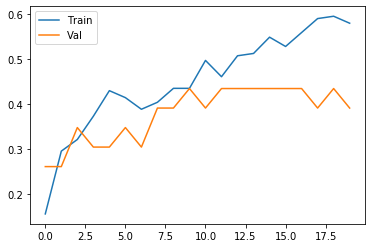

In [47]:
plt.plot(hist_1.history['accuracy'], label='Train')
plt.plot(hist_1.history['val_accuracy'], label='Val')
plt.legend();

In [48]:
model.evaluate(Xtest_ss, ytest)

24/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 582us/sample - loss: 1.0214 - accuracy: 0.5417


[1.0214112997055054, 0.5416667]

In [15]:
model = Sequential()

model.add(Dense(256, input_shape=(92,), 
                       activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(256, 
                       activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(256, 
                       activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(6, 
                    activation='softmax'))

model.compile(
    loss='categorical_crossentropy', 
    metrics=['accuracy'], 
    optimizer='rmsprop')

In [16]:
hist_2 = model.fit(xtrain,
                   y_train,
                   epochs=20,
                   batch_size=16,
                   validation_data=(x_val, y_val),
                   verbose=2)

Train on 193 samples, validate on 23 samples
Epoch 1/20
193/193 - 1s - loss: 2.0613 - accuracy: 0.2124 - val_loss: 1.5682 - val_accuracy: 0.4348
Epoch 2/20
193/193 - 0s - loss: 1.7325 - accuracy: 0.3316 - val_loss: 1.5085 - val_accuracy: 0.4348
Epoch 3/20
193/193 - 0s - loss: 1.4975 - accuracy: 0.3679 - val_loss: 1.4313 - val_accuracy: 0.3913
Epoch 4/20
193/193 - 0s - loss: 1.4484 - accuracy: 0.4041 - val_loss: 1.4057 - val_accuracy: 0.4348
Epoch 5/20
193/193 - 0s - loss: 1.5658 - accuracy: 0.3627 - val_loss: 1.3723 - val_accuracy: 0.4348
Epoch 6/20
193/193 - 0s - loss: 1.3012 - accuracy: 0.4974 - val_loss: 1.3777 - val_accuracy: 0.4783
Epoch 7/20
193/193 - 0s - loss: 1.2333 - accuracy: 0.4974 - val_loss: 1.3514 - val_accuracy: 0.4348
Epoch 8/20
193/193 - 0s - loss: 1.2674 - accuracy: 0.4974 - val_loss: 1.3072 - val_accuracy: 0.4783
Epoch 9/20
193/193 - 0s - loss: 1.1481 - accuracy: 0.5648 - val_loss: 1.3064 - val_accuracy: 0.4348
Epoch 10/20
193/193 - 0s - loss: 1.0892 - accuracy: 0.5

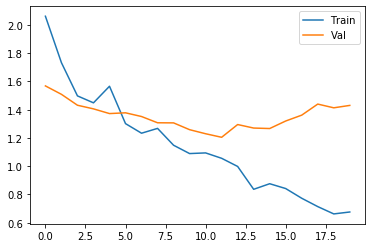

In [17]:
plt.plot(hist_2.history['loss'], label='Train')
plt.plot(hist_2.history['val_loss'], label='Val')
plt.legend();

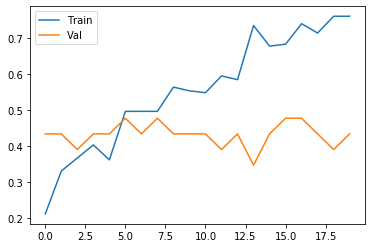

In [18]:
plt.plot(hist_2.history['accuracy'], label='Train')
plt.plot(hist_2.history['val_accuracy'], label='Val')
plt.legend();